In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Surprise and Entropy

Let's say we're flipping a coin 10 times and 90% of the time we get heads, the probability (p) of getting heads and tails would be:

In [3]:
p_heads=0.9
p_tails=0.1

Since the p_heads is significantly higher than p_tails, our surprise (S) of getting tails we'll be higher than if we get heads.

So now we know that there is a type of inverse relationship between p and S


$S = log_2 (1/p)$

The closer we get to zero (some event that is highly unlikely to happen), we'll be more suprised if it does happen. Conversely, we won't be surprised when something happening if its probability is 1. Let's plot this to get a better sense of it.

In [8]:
x = np.linspace(0,1,10000000)
y = np.log2(1/x)

C:\Users\BIRDPE~1\AppData\Local\Temp/ipykernel_14576/4052565178.py:2: RuntimeWarning: divide by zero encountered in true_divide
  y = np.log2(1/x)


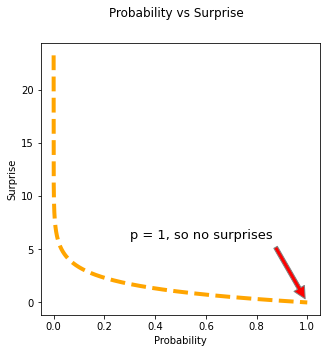

In [24]:
fig, ax = plt.subplots(figsize = (5,5))
plt.suptitle('Probability vs Surprise') # main (superior) title

ax.plot(x,abs(y), lw=4, color='orange', linestyle='--')
ax.set_xlabel('Probability')
ax.set_ylabel('Surprise')

ax.annotate('p = 1, so no surprises', xy=(1, 0), xytext=(0.3, 6), fontsize=13,
            arrowprops=dict(facecolor='red', edgecolor = 'grey', shrink=0.06))
plt.show()

Going back to our coin toss example, we were getting heads 90% of the time we flip it, then we can calculate the `p` and `S` of each event (heads and tails)

In [28]:
p_heads=0.9
p_tails=0.1

S_heads= np.log2(1/p_heads)
S_tails= np.log2(1/p_tails)

In [30]:
pd.set_option('display.float_format','{:.2f}'.format)

data = {'heads':[p_heads,S_heads],'tails':[p_tails,S_tails]}
pd.DataFrame(data, index=['Probability','Surprise'])

,heads,tails
Probability,0.90,0.10
Surprise,0.15,3.32


If we flip the coin 'x' amount of times (let's say 100 times)  and want to calculate the total surprise we just sum the surprise of each toss

<blockquote>
probability of heads (p_heads) = 0.9 x num_tosses<br>  
  
<br> surprise of getting heads = np.log2(1/p_heads)<br>
    
probability of tails (p_tails) = 0.1 x num_tosses<br>
    
surprise of getting tails = np.log2(1/p_tails)<br>
</blockquote>
 

Formula:

\$Total Surprise = p(heads) x S(log(1/p(heads))) + p(tails) x S(log(1/p(tails)))$

In [91]:
num_tosses = 100 
Total_surprise = ((p_heads*num_tosses)*S_heads) + ((p_tails*num_tosses)*S_tails)

print('The total surprise in a {} tosses will be: '.format(num_tosses),round(Total_surprise,2))

The total surprise in a 100 tosses will be:  46.9


If we wanted to know the surprise per coin toss:

In [ ]:
surprise_per_toss = Total_surprise / num_tosses
print('Surprise per coin toss: ',round(surprise_per_toss,2))

Surprise per coin toss:  0.47


This is actually the entropy of the coin!!

`Entropy = expected value of the surprise`

Entropy is just the sum of every single probability * surprise of each value 

In [101]:
Entropy = sum([(p_heads*S_heads),(p_tails*S_tails)])
print('Entropy: ', round(Entropy,2))

Entropy:  0.47


So to drive this subject home, here's another example. Let's say we have a certain amount of data points and we want to calculate:
- probability
- surprise of each type of datapoint
- entropy of the whole thing

In [142]:
orange = 1
blue = 10
total_datapoints = sum([orange,blue])

# probability
p_orange = orange / total_datapoints
p_blue = blue / total_datapoints

# surprise of each
S_orange = np.log2(1/p_orange)
S_blue = np.log2(1/p_blue)

# total entropy
Total_entropy = sum([(S_orange*p_orange),(S_blue*p_blue)])

data_example = {'orange':[p_orange,S_orange],
                           'blue':[p_blue,S_blue]}

df_datap = pd.DataFrame(data_example, index=['probability','surprise'])
print(df_datap)
print('Total entropy: ', round(Total_entropy,2))

             orange  blue
probability    0.09  0.91
surprise       3.46  0.14
Total entropy:  0.44


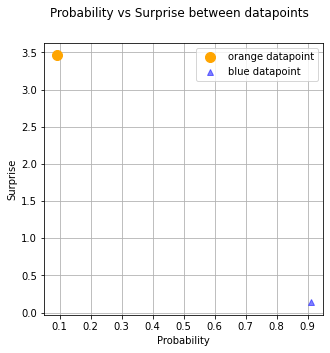

In [143]:
fig, ax = plt.subplots(figsize = (5,5))
plt.suptitle('Probability vs Surprise between datapoints') # main (superior) title

ax.plot(p_orange,S_orange, 'o', ms='10',color='orange', label = 'orange datapoint')
ax.plot(p_blue,S_blue, "^",color='blue', alpha = 0.5,label = 'blue datapoint')
ax.legend()
ax.grid()

ax.set_xlabel('Probability')
ax.set_ylabel('Surprise')
plt.show()